In [59]:
%pip install kagglehub
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [60]:
# Importieren der benötigten Bibliotheken
import kagglehub
import os
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
#test file for VScode
#Importieren des Datensatzes


# Download latest version
path = kagglehub.dataset_download("gustavofadel/clothes-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\andre\.cache\kagglehub\datasets\gustavofadel\clothes-dataset\versions\2


In [61]:
#Pfad zum extrahierten Dataset 
dataset_path = r"C:\Users\andre\.cache\kagglehub\datasets\gustavofadel\clothes-dataset\versions\2"

# Alle Bilddateien sammeln
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):
            full_path = os.path.join(root, file)
            image_files.append(full_path)
            
print(f"{len(image_files)} Bilder gefunden.")


300 Bilder gefunden.


In [62]:
# Bilddaten mit Label (Ordnername) sammeln
image_data = []
for path in image_files:
    label = os.path.basename(os.path.dirname(path))
    image_data.append({
        "filename": os.path.basename(path),
        "path": path,
        "label": label
    })
# Extrahieren des Datensatzes
# Hier wird der Pfad zu den Bilddateien in eine CSV-Datei geschrieben
# Beispielhafte Struktur
#image_data = [{"filename": os.path.basename(path), "path": path} for path in image_files]


In [63]:
# JSON speichern (optional)
with open("images_metadata.json", "w") as json_file:
    json.dump(image_data, json_file, indent=4)

print("JSON-Datei gespeichert: images_metadata.json")



#Code zum Speichern der Bilddaten in einer CSV-Datei, falls später benötigt:

#df = pd.DataFrame(image_data)
#df.to_csv("images_metadata.csv", index=False)

#print("CSV-Datei gespeichert: images_metadata.csv")

JSON-Datei gespeichert: images_metadata.json


In [92]:
#Zum debuggen
df = pd.DataFrame(image_data)
print(df.columns)       # Sollte 'filename', 'path', 'label' enthalten
print(df.head())         # Erste Zeilen anzeigen
print(type(image_data))
print(len(image_data))
print(image_data[0] if image_data else "image_data ist leer")

Index(['filename', 'path', 'label'], dtype='object')
  filename                                               path  label
0   01.jpg  C:\Users\andre\.cache\kagglehub\datasets\gusta...  pants
1   02.jpg  C:\Users\andre\.cache\kagglehub\datasets\gusta...  pants
2   03.jpg  C:\Users\andre\.cache\kagglehub\datasets\gusta...  pants
3   04.jpg  C:\Users\andre\.cache\kagglehub\datasets\gusta...  pants
4   05.jpg  C:\Users\andre\.cache\kagglehub\datasets\gusta...  pants
<class 'list'>
300
{'filename': '01.jpg', 'path': 'C:\\Users\\andre\\.cache\\kagglehub\\datasets\\gustavofadel\\clothes-dataset\\versions\\2\\clothes\\test\\pants\\01.jpg', 'label': 'pants'}


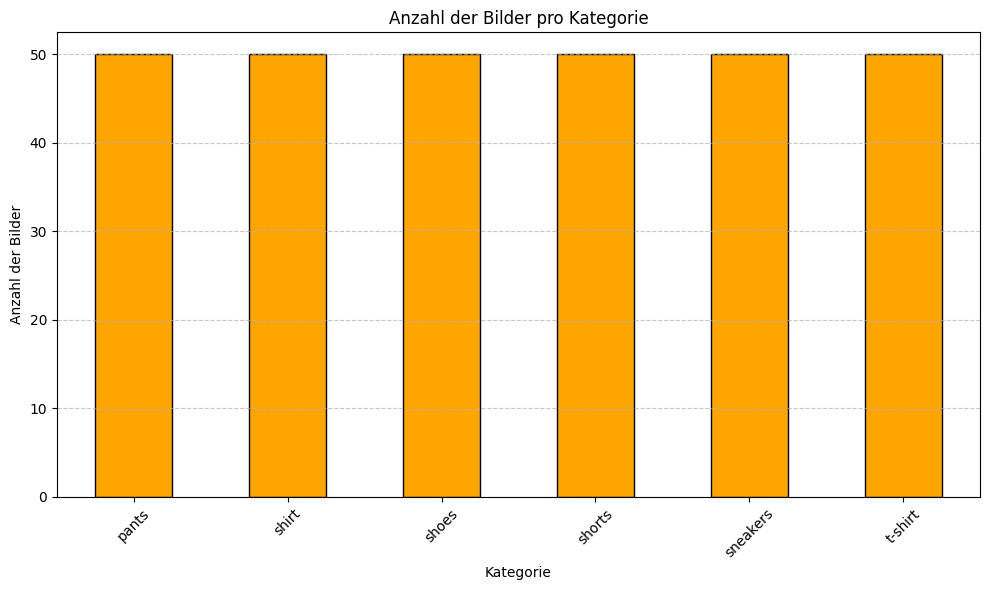

In [96]:
# Bildanzahl pro Kategorie zählen
label_counts = df["label"].value_counts()

# Balkendiagramm zeichnen
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Anzahl der Bilder pro Kategorie")
plt.xlabel("Kategorie")
plt.ylabel("Anzahl der Bilder")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [97]:
dataset_path = r"C:\Users\andre\.cache\kagglehub\datasets\gustavofadel\clothes-dataset\versions\2"

# Zielordner für JSON-Dateien
json_output_folder = os.path.join(dataset_path, "json_output")
os.makedirs(json_output_folder, exist_ok=True)

# Alle JPGs durchgehen
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):
            file_path = os.path.join(root, file)

            # Bilddatei lesen und base64-kodieren
            with open(file_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

            # JSON-Daten erstellen
            image_json = {
                "filename": file,
                "label": os.path.basename(os.path.dirname(file_path)),  # optionaler Label-Name
                "image_data_base64": encoded_string
            }

            # JSON-Datei speichern
            json_filename = os.path.splitext(file)[0] + ".json"
            json_path = os.path.join(json_output_folder, json_filename)
            with open(json_path, "w") as json_file:
                json.dump(image_json, json_file)

print("Alle JPG-Dateien wurden als JSON gespeichert.")


Alle JPG-Dateien wurden als JSON gespeichert.


In [98]:
# Pfad zum Ordner mit den einzelnen JSON-Dateien
json_folder = r"C:\Users\andre\.cache\kagglehub\datasets\gustavofadel\clothes-dataset\versions\2\json_output"

# Liste zur Speicherung aller Einträge
combined_data = []

# Alle JSON-Dateien im Ordner durchgehen
for file in os.listdir(json_folder):
    if file.endswith(".json"):
        file_path = os.path.join(json_folder, file)
        with open(file_path, "r") as f:
            data = json.load(f)
            combined_data.append(data)

# Alles in eine große JSON-Datei schreiben
combined_path = os.path.join(json_folder, "combined_images.json")
with open(combined_path, "w") as f:
    json.dump(combined_data, f, indent=4)

print(f"Kombinierte Datei gespeichert unter:\n{combined_path}")

Kombinierte Datei gespeichert unter:
C:\Users\andre\.cache\kagglehub\datasets\gustavofadel\clothes-dataset\versions\2\json_output\combined_images.json
